In [16]:

import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

<IPython.core.display.Javascript object>


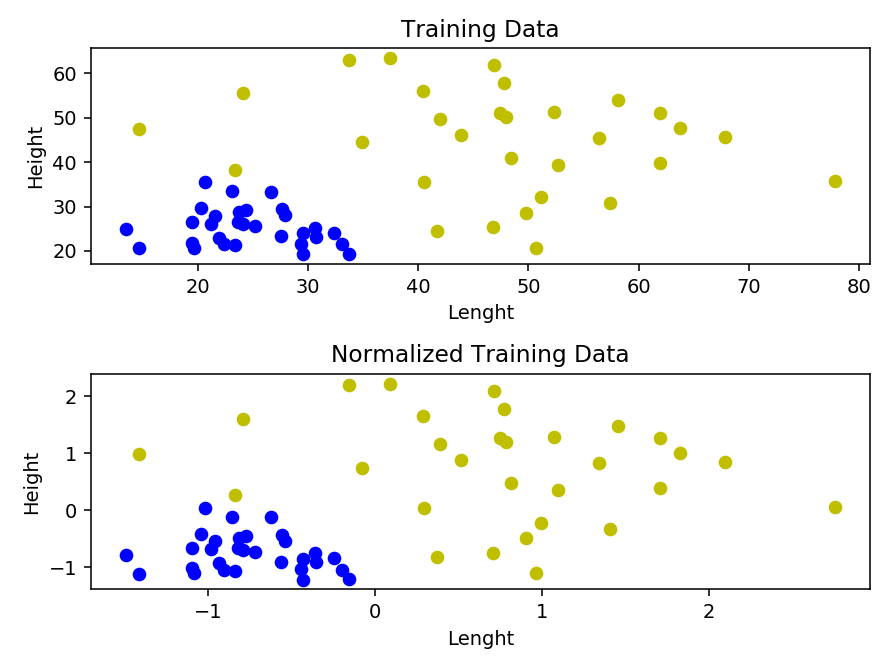

34.9148287623


In [30]:
#make data
sample_size = 30
np.random.seed(1)
cats = np.random.normal(25,5,(2, sample_size))
dogs = np.random.normal(45,15,(2, sample_size))


#plot
plt.subplot(211)
plt.title('Training Data')
plt.xlabel('Lenght')
plt.ylabel('Height')
plt.plot(cats[0],cats[1],'bo')
plt.plot(dogs[0],dogs[1],'yo')

#compute std and mean
mean_length = np.mean([dogs[0], cats[0]])
mean_height = np.mean([dogs[1], cats[1]])
print(mean_height)


std_length = np.std([dogs[0], cats[0]])
std_height = np.std([dogs[1], cats[1]])

cats_norm = np.zeros((2, 30))
dogs_norm = np.zeros((2, 30))

#normalize data
for elem in range(sample_size):
    cats_norm[0][elem] = (cats[0][elem] - mean_length) / std_length
    cats_norm[1][elem] = (cats[1][elem] - mean_height) / std_height
    
    dogs_norm[0][elem] = (dogs[0][elem] - mean_length) / std_length
    dogs_norm[1][elem] = (dogs[1][elem] - mean_height) / std_height

#plot
plt.subplot(212)
plt.title('Normalized Training Data')
plt.xlabel('Lenght')
plt.ylabel('Height')
plt.plot(cats_norm[0],cats_norm[1],'bo')
plt.plot(dogs_norm[0],dogs_norm[1],'yo')

plt.tight_layout()



In [10]:
def batching(batch_size):
    
    dic = {'vector': np.zeros((batch_size, 2)), 'labels': np.array([])}
    for x in range(batch_size):
        cat_or_dog = np.random.randint(0, 2)
    
        if cat_or_dog == 0:
            random = np.random.randint(0, 30)
            dic['vector'][x][0] = cats_norm[0][random]
            dic['vector'][x][1] = cats_norm[1][random]
            
        elif cat_or_dog == 1:
            random = np.random.randint(0, 30)
            dic['vector'][x][0] = dogs_norm[0][random]
            dic['vector'][x][1] = dogs_norm[1][random]
                                      
        dic['labels'] = np.append(dic['labels'], cat_or_dog)
    return dic

def actSigmoid(x):
    return 1/(1+np.exp(-x))
    

def forward(input_vector,weight):
    y = actSigmoid(np.dot(input_vector,weight))
    return y


def loss_function(dataset,weight):
    loss = 0
    for x in range(len(dataset)):
        loss += 0.5 * (dataset["labels"][x]
                        - forward(
                                dataset["vector"][x],
                                weight)**2)
    return loss

def function(x, derive = False):
    
    if(derive==True):
        return 2*x
    return x**2

#set up parameters
learning_rate = 0.1
weights = ([-2.5,-2.5])
batch_size = 1
gradient = np.zeros(2)

#do batching(dosiere)
dataset = batching(batch_size)
print("this is dataset",dataset)

#calculate gradient for dataset
for elem in weights:
    gradient = function(loss_function(dataset,elem),True)
print("this is the gradient",gradient)

#train
for training_step in range(20):
                     
    weights[0] = weights[0] - learning_rate * gradient[0]
    weights[1] = weights[1] - learning_rate * gradient[1]
    
    print("this is w1",weights[0])
    print("this is w2",weights[1])


IndexError: index 19 is out of bounds for axis 0 with size 2

<IPython.core.display.Javascript object>


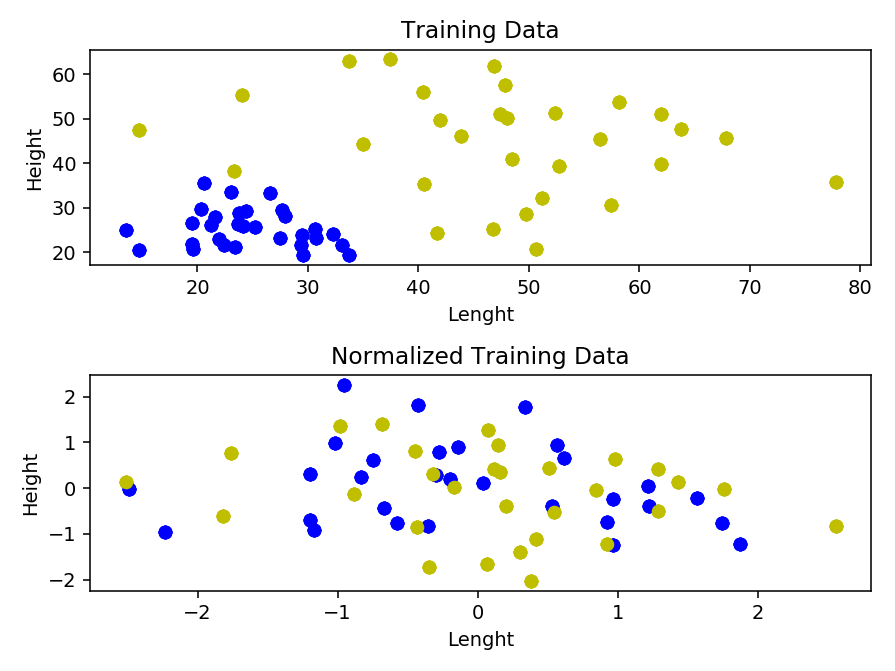